In [1]:
import sys
import os

# Get the directory path of the notebook
notebook_directory = os.path.dirname(os.path.abspath("__file__"))

# Get the directory path of the project (one level up)
project_directory = os.path.dirname(notebook_directory)

# Add the project directory to the Python module search path
sys.path.append(project_directory)

# Now you can import the LoadJSON module from DataLoaderLocal
from shared_utilities.DataLoaderLocal import LoadReviews

import pandas as pd
import utility_func as utils
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [2]:
reviews = LoadReviews()

utils.YelpDatasets_Reviews(reviews_df = reviews)


Reviews DataFrame's head:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [3]:
reviews = reviews.sample(n=50000, random_state=42)
display(reviews)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1295256,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53
3297618,HlXP79ecTquSVXmjM10QxQ,bAt9OUFX9ZRgGLCXG22UmA,pBNucviUkNsiqhJv5IFpjg,5,0,0,0,I needed a new tires for my wife's car. They h...,2020-05-24 12:22:14
1217795,JBBULrjyGx6vHto2osk_CQ,NRHPcLq2vGWqgqwVugSgnQ,8sf9kv6O4GgEb0j1o22N1g,5,0,0,0,Jim Woltman who works at Goleta Honda is 5 sta...,2019-02-14 03:47:48
3730348,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49
1826590,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25
...,...,...,...,...,...,...,...,...,...
4370202,ggBVjncLGaFcZuTMTowdzQ,cV249zT-6-ebc55E097mcw,H3Tmgv94pbGvBIKZ4Rs9Cw,3,0,0,0,I got the seared snapper with butternut squash...,2015-10-22 13:44:25
2440848,S_i_zK_VIxnxCz7eHoQskQ,rL5uMarIYnEMgDr09pafqg,MbNcVhRqpNPcvgFzWgaxSQ,4,9,4,9,After just one visit I knew I would be a fan o...,2015-08-22 13:04:32
6844225,t_hAiTVFLXqEW4mhkWQdYQ,RQdUrCQAgDx4ZTnWk9PDkg,rErcCh6baqUXkJUbGJZb5Q,1,0,0,0,I had been using Ambler Savings for as long as...,2021-08-11 18:51:16
3097922,qnVvfW-6jdYxPmDXMC46-g,oeBfz1fCDrX9p-6cfTF_cw,LfWs66gXWB7KYolW6xAu-g,5,0,0,0,Some of the best Italian in Edmonton the way t...,2017-04-06 00:50:32


#### Times series using Number of reviews

In [3]:
# change the structure of date column
reviews['date'] = pd.to_datetime(reviews['date']).dt.strftime('%Y-%m')

In [4]:
#group by date and review_id to get the number of reviews per month and year
reviews_per_month = reviews.groupby(['date'])['review_id'].count().reset_index()
reviews_per_month.columns = ['date', 'count']
reviews_per_month['date'] = pd.to_datetime(reviews_per_month['date'])
reviews_per_month = reviews_per_month.sort_values(by='date')
reviews_per_month.head()

,date,count
0,2005-02-01,3
1,2005-03-01,74
2,2005-04-01,26
3,2005-05-01,108
4,2005-06-01,38


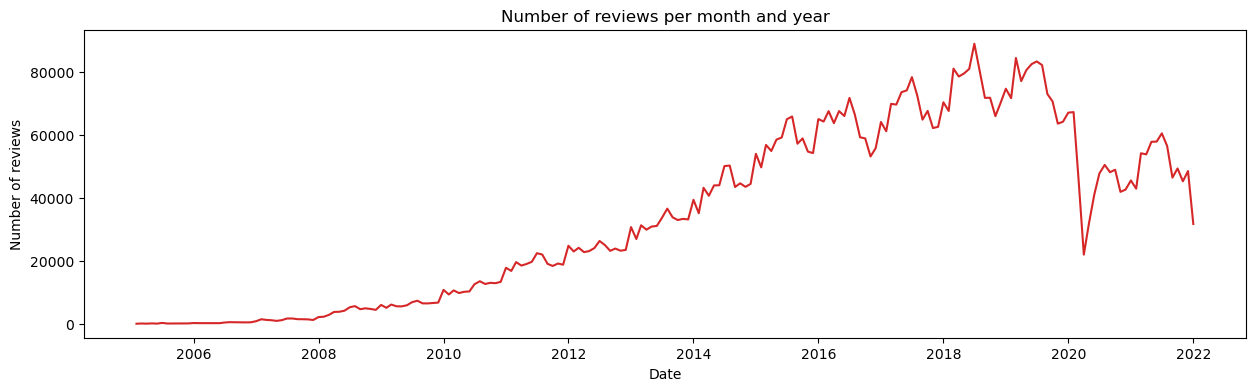

In [5]:
def plot_df(x, y, title="", xlabel='Date', ylabel='Number of reviews', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(x=reviews_per_month['date'], y=reviews_per_month['count'], title='Number of reviews per month and year')

In [6]:
'''#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

x = reviews_per_month['date'].values
y1 = reviews_per_month['count'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-90000, 90000)
plt.title('Number of reviews per month and year (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(reviews_per_month['date']), xmax=np.max(reviews_per_month['date']), linewidth=.5)
plt.show()'''

"#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.\n\nx = reviews_per_month['date'].values\ny1 = reviews_per_month['count'].values\n\n# Plot\nfig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)\nplt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')\nplt.ylim(-90000, 90000)\nplt.title('Number of reviews per month and year (Two Side View)', fontsize=16)\nplt.hlines(y=0, xmin=np.min(reviews_per_month['date']), xmax=np.max(reviews_per_month['date']), linewidth=.5)\nplt.show()"

In [6]:
#count reviews per business and year
reviews
# Extracting the year from the date
count_rev_bus = reviews.groupby(['business_id', 'date'])['review_id'].count().reset_index()
count_rev_bus.columns = ['business_id', 'date', 'count']
count_rev_bus['date'] = pd.to_datetime(count_rev_bus['date'])
count_rev_bus = count_rev_bus.sort_values(by=['date','business_id'])
count_rev_bus['year'] = count_rev_bus['date'].dt.year
count_rev_bus.head()

,business_id,date,count,year
197700,2bXm0SynOfxDzfrdrCyXqg,2005-02-01,1,2005
254130,3g6XqkBikTTbZmTukbeGnw,2005-02-01,1,2005
1404417,PP3BBaVxZLcJU54uP_wL6Q,2005-02-01,1,2005
106148,0uxg3_noVCE78Wgjb8DSyA,2005-03-01,1,2005
146912,1dLWCD6CjSHD7PTfi5ZVNQ,2005-03-01,1,2005


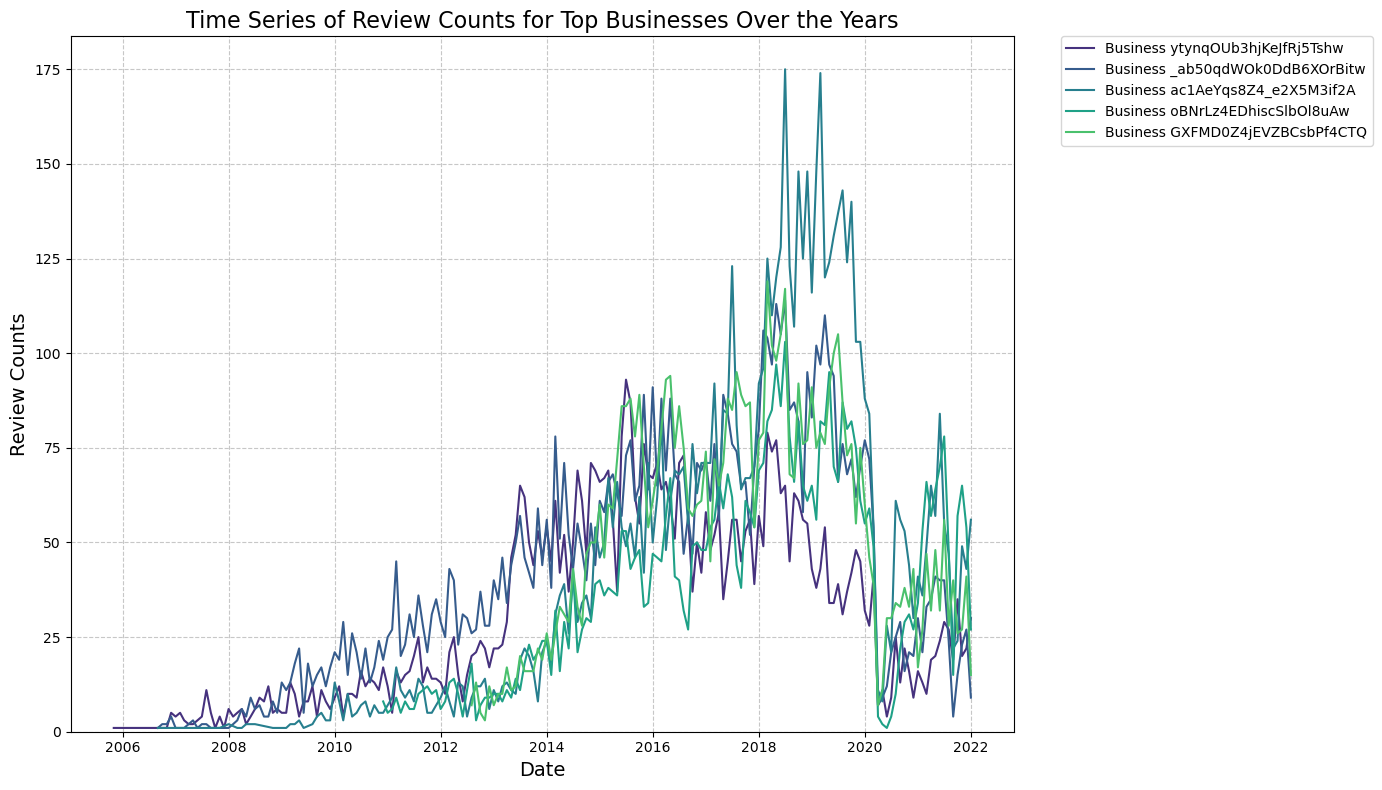

In [7]:
def plot_top_businesses_over_time(df, top_businesses_series):
    """
    Plot the time series of review counts for the top businesses over the years.

    Parameters:
    - df: DataFrame with columns 'business_id', 'date', 'count', and 'year'.
    - top_businesses_series: Pandas Series with the top businesses and their review counts.
    """
    # Convert the Series to a DataFrame
    top_businesses_df = top_businesses_series.reset_index()

    # Filter the DataFrame to include only the top businesses
    top_businesses_df = df[df['business_id'].isin(top_businesses_df['business_id'])]

    # Plotting
    plt.figure(figsize=(14, 8))
    sns.set_palette("viridis")  # You can choose a different color palette if needed

    for business_id in top_businesses_df['business_id'].unique():
        business_data = top_businesses_df[top_businesses_df['business_id'] == business_id]
        sns.lineplot(x='date', y='count', data=business_data, label=f'Business {business_id}')

    plt.title('Time Series of Review Counts for Top Businesses Over the Years', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Review Counts', fontsize=14)
    plt.legend()
    
    # Set y-axis limits to start from 0
    plt.ylim(bottom=0)
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add a legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    plt.show()

# Example usage:
# Assuming you have a list of top businesses called 'top_businesses_list'
top_businesses_series = count_rev_bus.groupby(['business_id'])['count'].sum().sort_values(ascending=False).head(5)
plot_top_businesses_over_time(count_rev_bus, top_businesses_series)

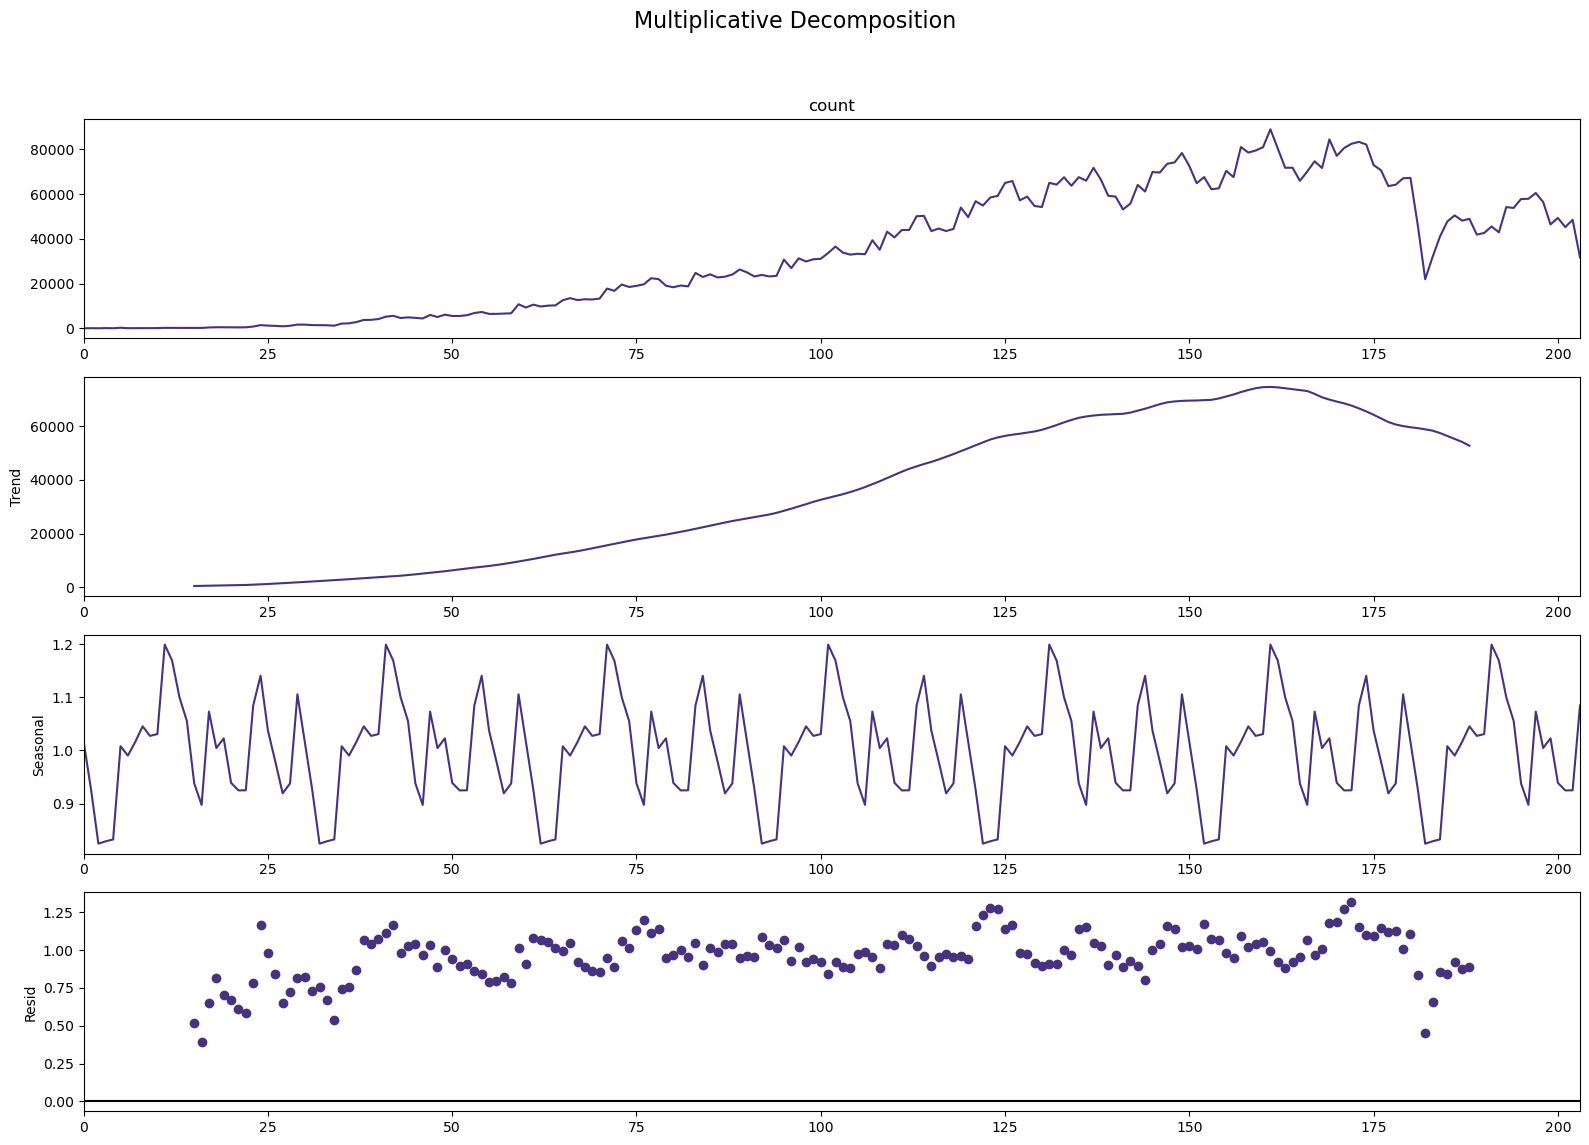

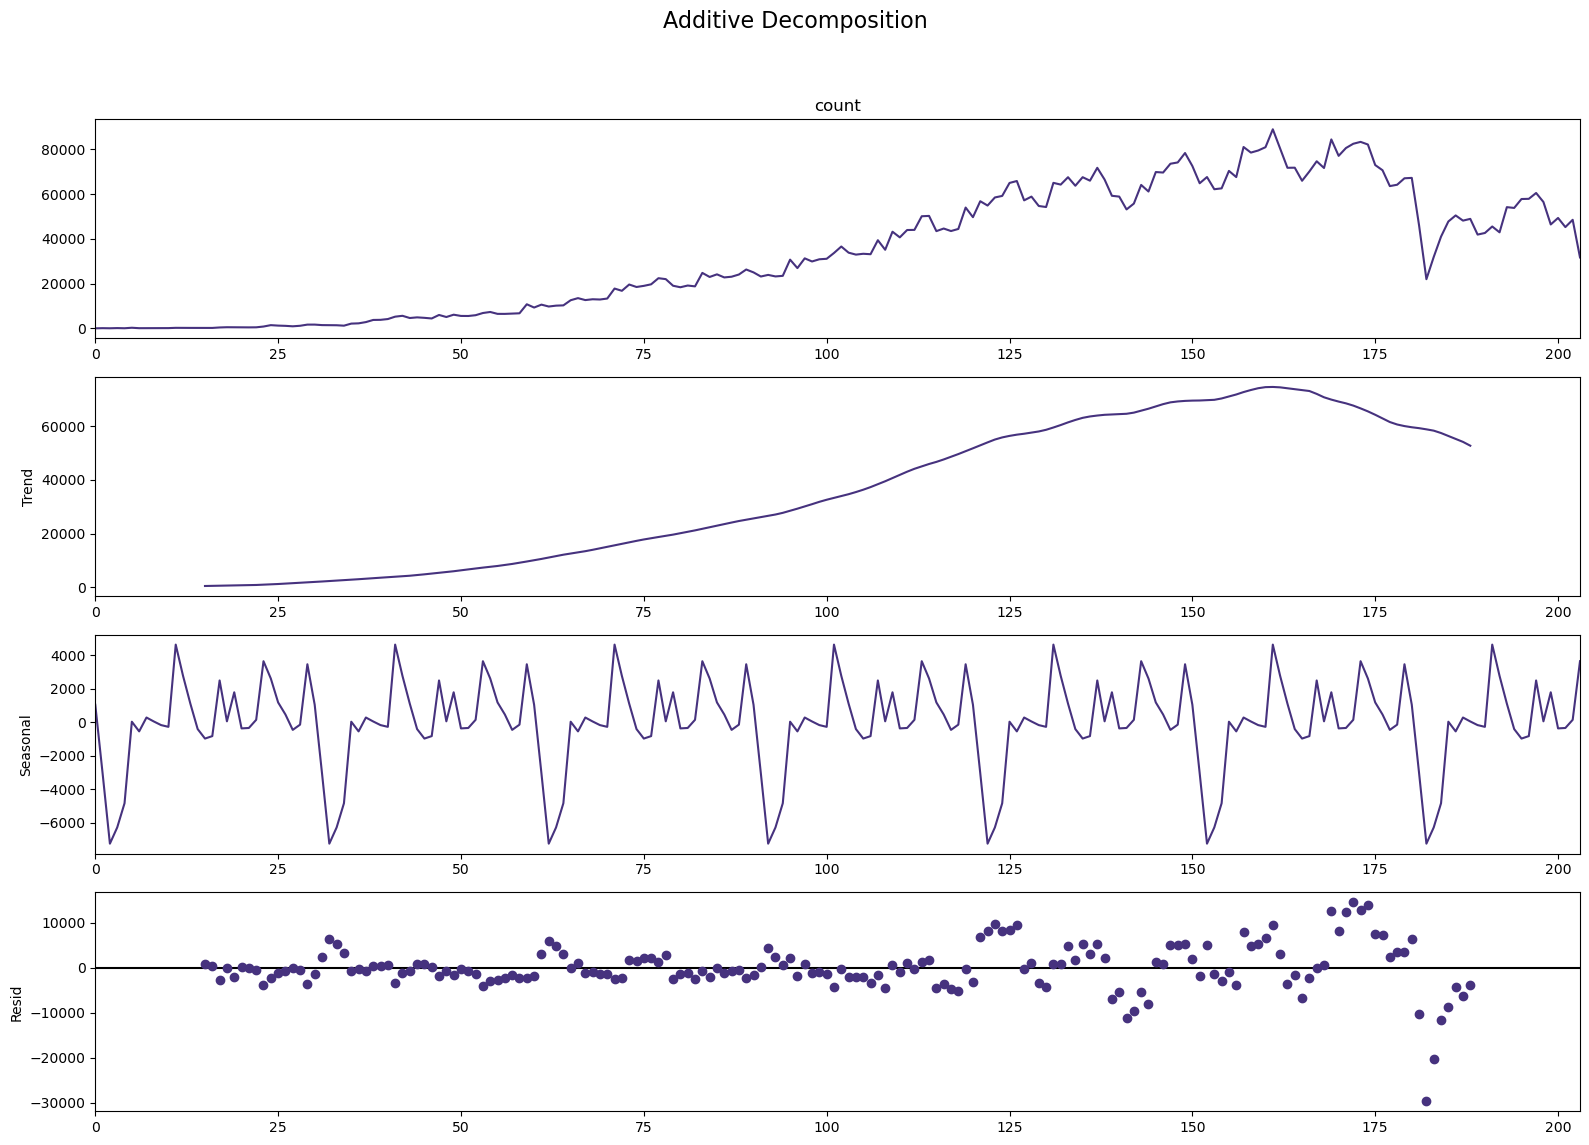

In [8]:
##### Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
##The seasonal_decompose in statsmodels implements this conveniently.

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(reviews_per_month['count'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(reviews_per_month['count'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

#### Second approach - Sentiments

In [9]:
#1 and 2 stars = -1 while 4 and 5 stars = +1
df=reviews
df = df[df['stars'] != 3]
df['sentiment'] = df['stars'].apply(lambda rating : +1 if rating > 3 else -1)

/var/folders/7h/r2qhkyrj6x951_n8cq54_49w0000gn/T/ipykernel_3941/653212630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['stars'].apply(lambda rating : +1 if rating > 3 else -1)


In [10]:
df_num = df.copy()

In [11]:
# Assuming replacing -1 and 1 with negative and positive respectively
df['sentiment'] = df['sentiment'].replace({-1: 'negative', 1: 'positive'})

/var/folders/7h/r2qhkyrj6x951_n8cq54_49w0000gn/T/ipykernel_3941/3647008845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].replace({-1: 'negative', 1: 'positive'})


In [12]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
df_num['date'] = pd.to_datetime(df_num['date']).dt.strftime('%Y-%m')

/var/folders/7h/r2qhkyrj6x951_n8cq54_49w0000gn/T/ipykernel_3941/3550849715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')


In [13]:
# Dividing the reviews to positive and negative
pos = df[df['sentiment']=='positive'][['review_id','business_id','date','sentiment']]
neg = df[df['sentiment']=='negative'][['review_id','business_id','date','sentiment']]

In [14]:
#Preprocessing data
# change the structure of date column
#group by date and review_id to get the number of reviews per month and year
pos_pp = utils.preprocess_sentiment_df(pos)
neg_pp = utils.preprocess_sentiment_df(neg)

In [15]:
display(pos.head())
display(pos_pp.head())

,review_id,business_id,date,sentiment
1,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,2012-01,positive
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,2015-01,positive
4,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,2017-01,positive
6,6AxgBCNX_PNTOxmbRSwcKQ,gmjsEdUsKpj9Xxu6pdjH0g,2015-01,positive
7,_ZeMknuYdlQcUqng_Im3yg,LHSTtnW3YHCeUkRDGyJOyw,2015-08,positive


,date,review_id
0,2005-02-01,3
1,2005-03-01,43
2,2005-04-01,21
3,2005-05-01,84
4,2005-06-01,30


In [16]:
#Here we are going to sum the number of positive and negative reviews per month and year
#group by date and review_id to get the number of reviews per month and year
df_num= df_num.groupby(['date'])['sentiment'].sum().reset_index()
df_num['date'] = pd.to_datetime(df_num['date'])
df_num = df_num.sort_values(by='date')
df_num.rename(columns={'sentiment': 'sentiment_count_diff'}, inplace=True)
df_num

,date,sentiment_count_diff
0,2005-02-01,3
1,2005-03-01,30
2,2005-04-01,20
3,2005-05-01,76
4,2005-06-01,26
...,...,...
199,2021-09-01,15519
200,2021-10-01,17639
201,2021-11-01,16819
202,2021-12-01,18090


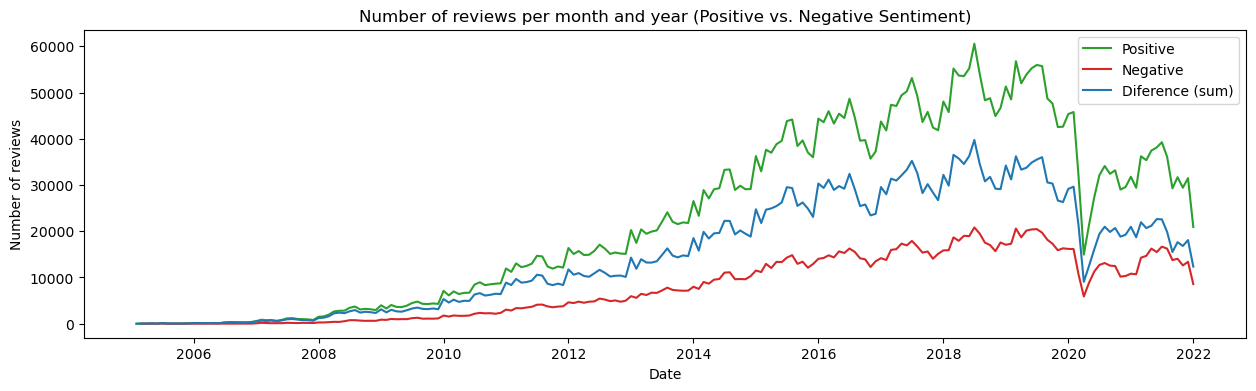

In [17]:
#Visualize the number of reviews per month and year (Positive vs. Negative Sentiment) and the sentiment sum 
utils.plot_df(x_pos=pos_pp['date'], y_pos=pos_pp['review_id'],
              x_neg=neg_pp['date'], y_neg=neg_pp['review_id'],
              x_df_num=df_num['date'], y_df_num=df_num['sentiment_count_diff'],
              title='Number of reviews per month and year (Positive vs. Negative Sentiment)')


In [30]:
'''#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

x = pos_pp['date'].values
y1 = pos_pp['review_id'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-70000, 70000)
plt.title('Number of reviews per month and year (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(pos_pp['date']), xmax=np.max(pos_pp['date']), linewidth=.5)
plt.show()'''

"#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.\n\nx = pos_pp['date'].values\ny1 = pos_pp['review_id'].values\n\n# Plot\nfig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)\nplt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')\nplt.ylim(-70000, 70000)\nplt.title('Number of reviews per month and year (Two Side View)', fontsize=16)\nplt.hlines(y=0, xmin=np.min(pos_pp['date']), xmax=np.max(pos_pp['date']), linewidth=.5)\nplt.show()"

In [21]:
'''#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

x = neg_pp['date'].values
y1 = neg_pp['review_id'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='red')
plt.ylim(-25000, 25000)
plt.title('Number of reviews per month and year (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(neg_pp['date']), xmax=np.max(neg_pp['date']), linewidth=.5)
plt.show()'''

"#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.\n\nx = neg_pp['date'].values\ny1 = neg_pp['review_id'].values\n\n# Plot\nfig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)\nplt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='red')\nplt.ylim(-25000, 25000)\nplt.title('Number of reviews per month and year (Two Side View)', fontsize=16)\nplt.hlines(y=0, xmin=np.min(neg_pp['date']), xmax=np.max(neg_pp['date']), linewidth=.5)\nplt.show()"

In [18]:
def business_review_counts(df):
    top_business = df.groupby(['business_id', 'date'])['review_id'].count().reset_index()
    top_business.columns = ['business_id', 'date', 'count']
    top_business['date'] = pd.to_datetime(top_business['date'])
    top_business = top_business.sort_values(by=['date', 'business_id'])
    top_business['year'] = top_business['date'].dt.year
    return top_business

# Assuming 'pos' and 'neg' are DataFrames with columns 'business_id', 'date', and 'review_id'
pos_business_counts = business_review_counts(pos)
neg_business_counts = business_review_counts(neg)

# Get the top 10 businesses by total review count
top_10_pos_business_ids = pos_business_counts.groupby('business_id')['count'].sum().nlargest(10).index
top_10_pos_business = pos_business_counts[pos_business_counts['business_id'].isin(top_10_pos_business_ids)]

top_10_neg_business_ids = neg_business_counts.groupby('business_id')['count'].sum().nlargest(10).index
top_10_neg_business = neg_business_counts[neg_business_counts['business_id'].isin(top_10_neg_business_ids)]


display(top_10_pos_business)

,business_id,date,count,year
1419916,_C7QiQQc47AOEv4PE3Kong,2005-05-01,1,2005
1419917,_C7QiQQc47AOEv4PE3Kong,2005-07-01,1,2005
2402784,ytynqOUb3hjKeJfRj5Tshw,2005-11-01,1,2005
1419918,_C7QiQQc47AOEv4PE3Kong,2006-02-01,1,2006
1419919,_C7QiQQc47AOEv4PE3Kong,2006-03-01,1,2006
...,...,...,...,...
1434580,_ab50qdWOk0DdB6XOrBitw,2022-01-01,7,2022
1472771,ac1AeYqs8Z4_e2X5M3if2A,2022-01-01,40,2022
1695879,gTC8IQ_i8zXytWSly3Ttvg,2022-01-01,7,2022
1990586,oBNrLz4EDhiscSlbOl8uAw,2022-01-01,25,2022


In [19]:
# Extracting the year from the date
pos = pos.groupby(['business_id', 'date'])['review_id'].count().reset_index()
pos.columns = ['business_id', 'date', 'count']
pos['date'] = pd.to_datetime(pos['date'])
pos = pos.sort_values(by=['date','business_id'])
pos['year'] = pos['date'].dt.year
pos.head(10)

,business_id,date,count,year
142192,2bXm0SynOfxDzfrdrCyXqg,2005-02-01,1,2005
182475,3g6XqkBikTTbZmTukbeGnw,2005-02-01,1,2005
1007276,PP3BBaVxZLcJU54uP_wL6Q,2005-02-01,1,2005
76415,0uxg3_noVCE78Wgjb8DSyA,2005-03-01,1,2005
105885,1dLWCD6CjSHD7PTfi5ZVNQ,2005-03-01,1,2005
124137,29YqJwOGEuAWqlHZxMc1OA,2005-03-01,1,2005
233539,50yKOLjTxUXKkLVYrAHRAw,2005-03-01,1,2005
288682,6RBZfirnzE4NahJTn1UPNA,2005-03-01,1,2005
355804,8A5LSwsKK5vXDH1M3_Tf1w,2005-03-01,2,2005
393055,96myvjjiQW8ZFp4LrE1gXQ,2005-03-01,1,2005


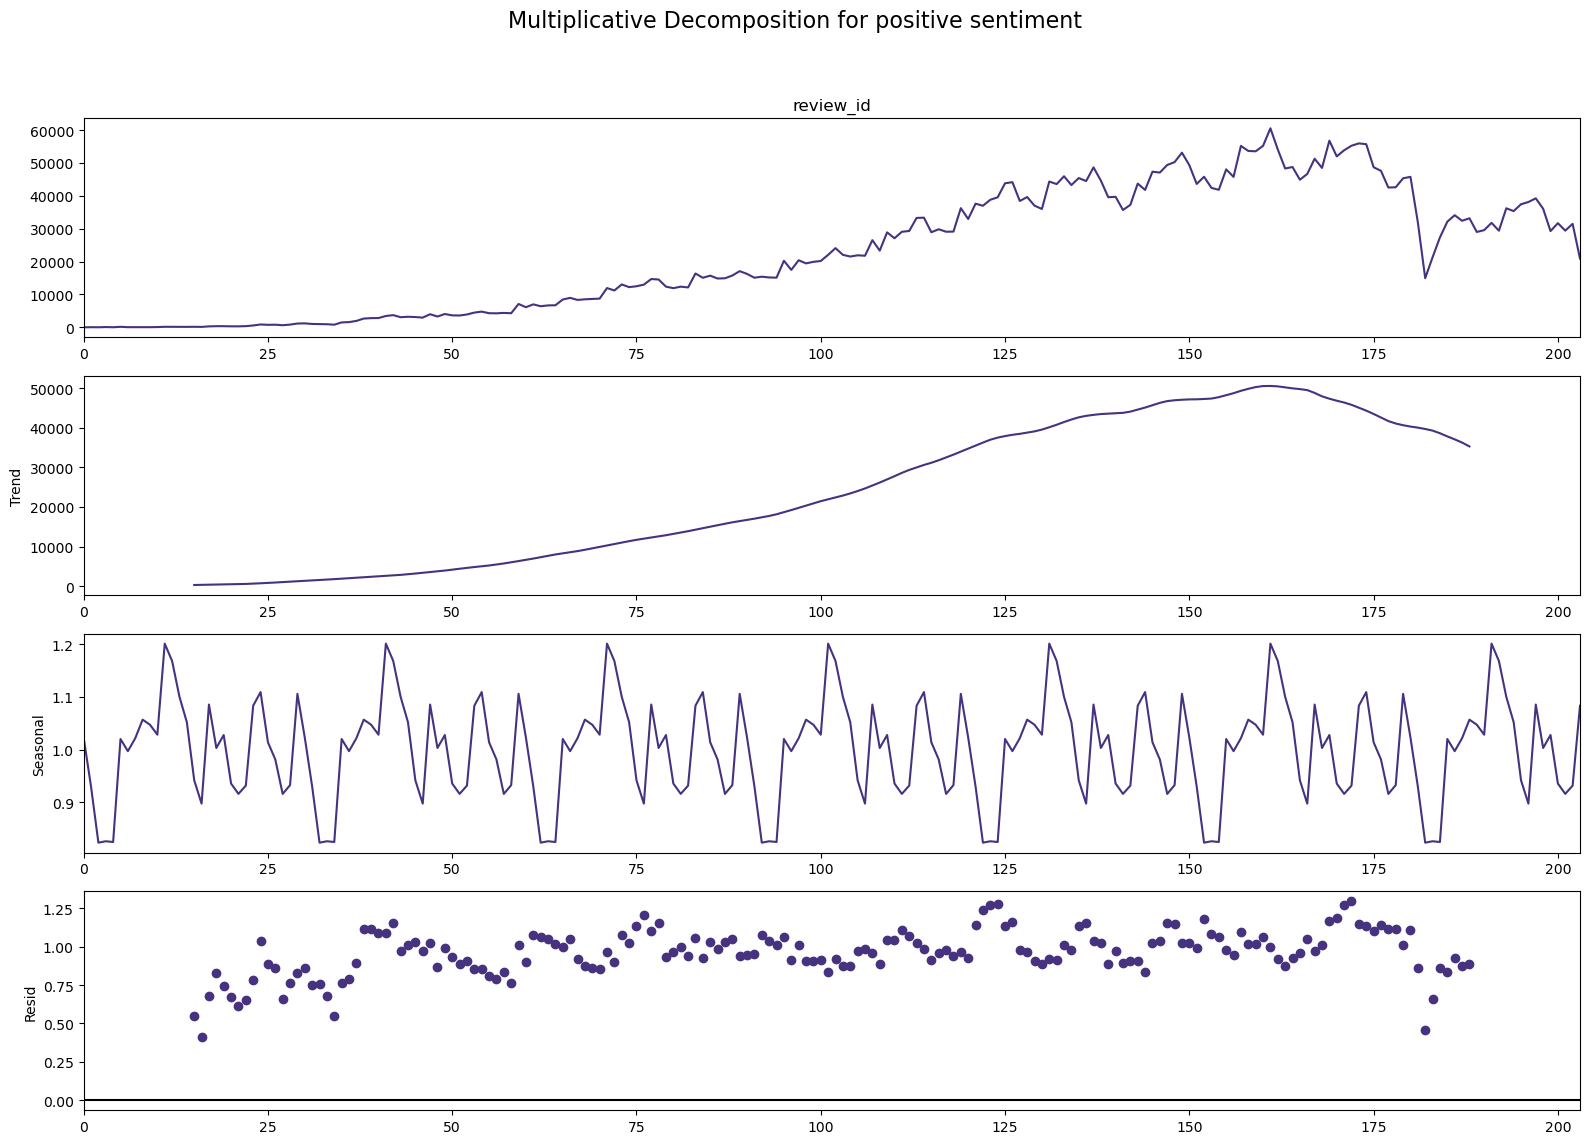

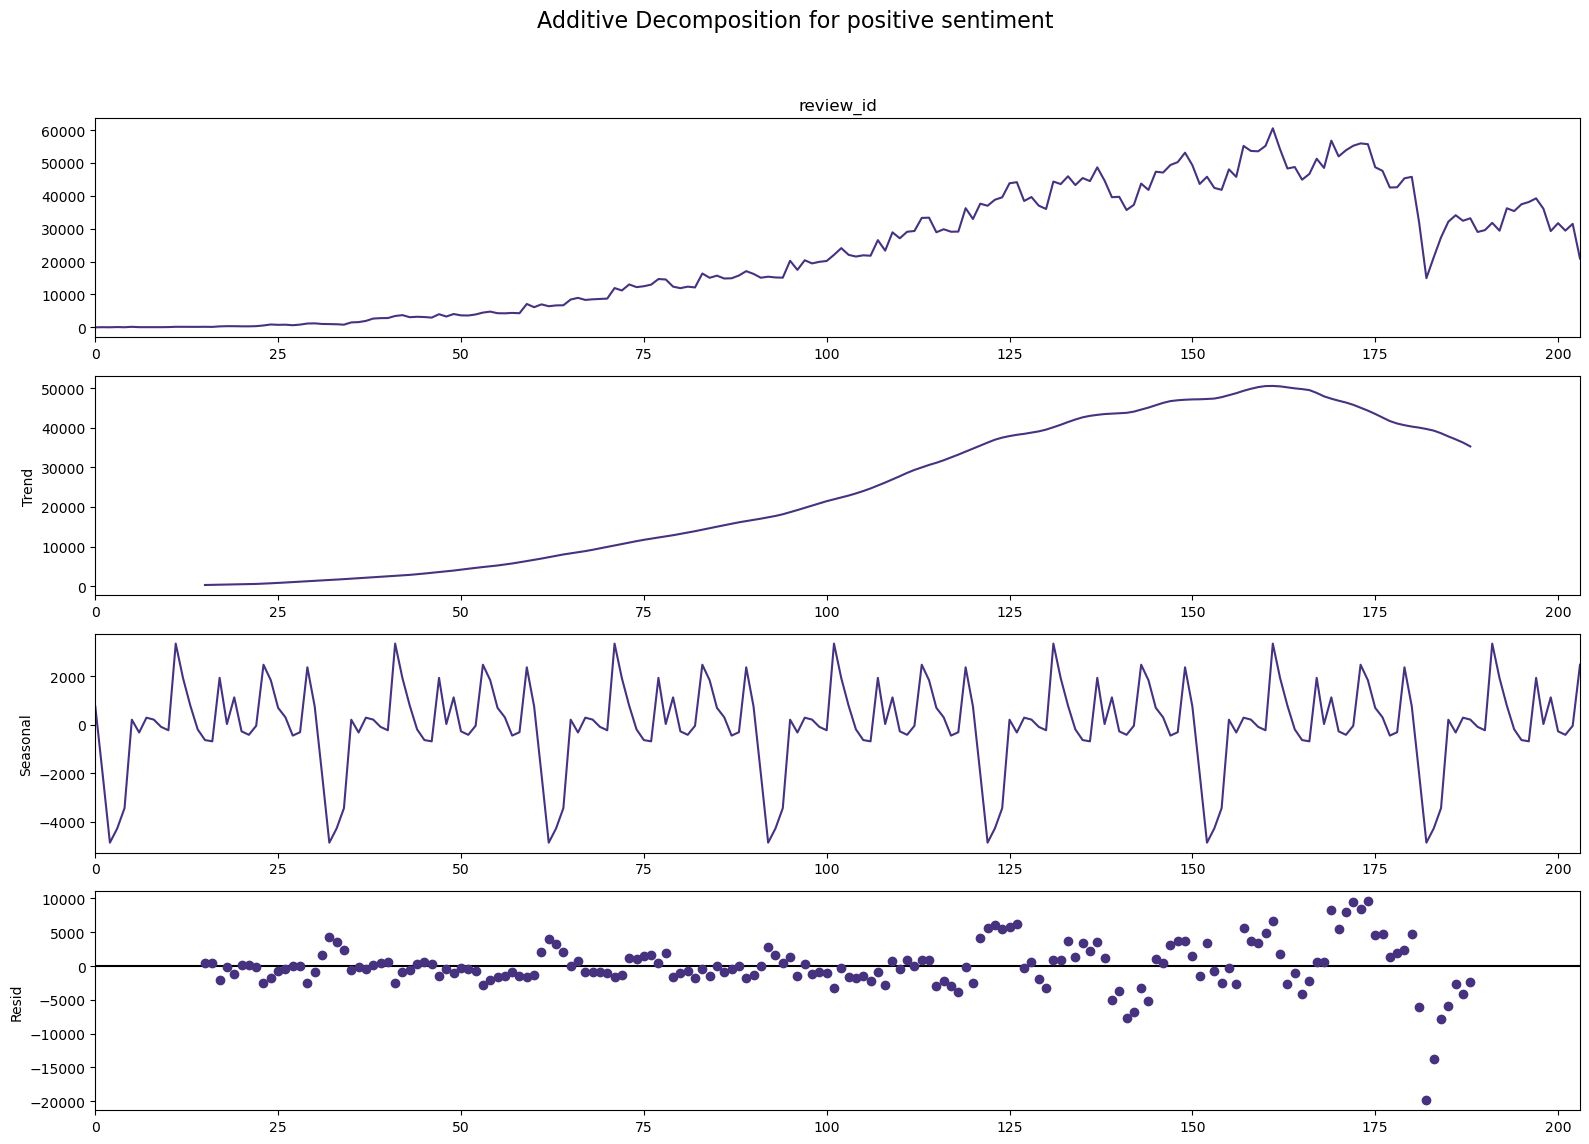

In [20]:
##### Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
##The seasonal_decompose in statsmodels implements this conveniently.

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(pos_pp['review_id'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(pos_pp['review_id'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition for positive sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition for positive sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

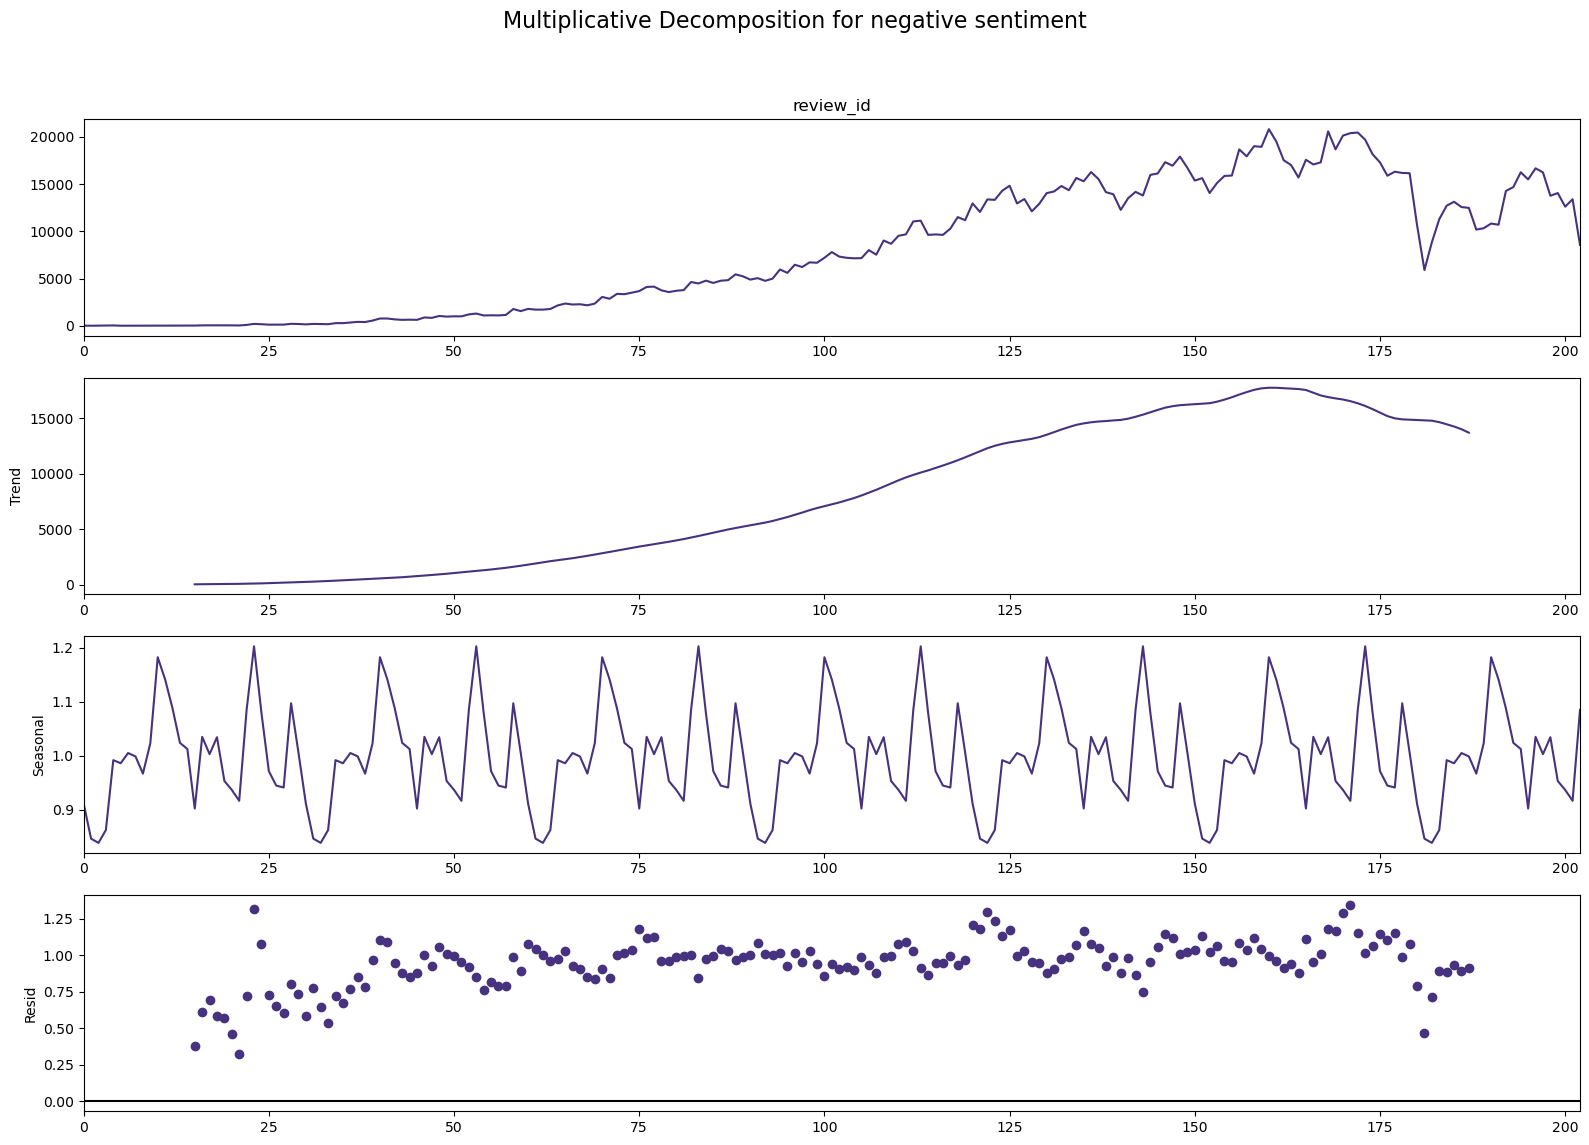

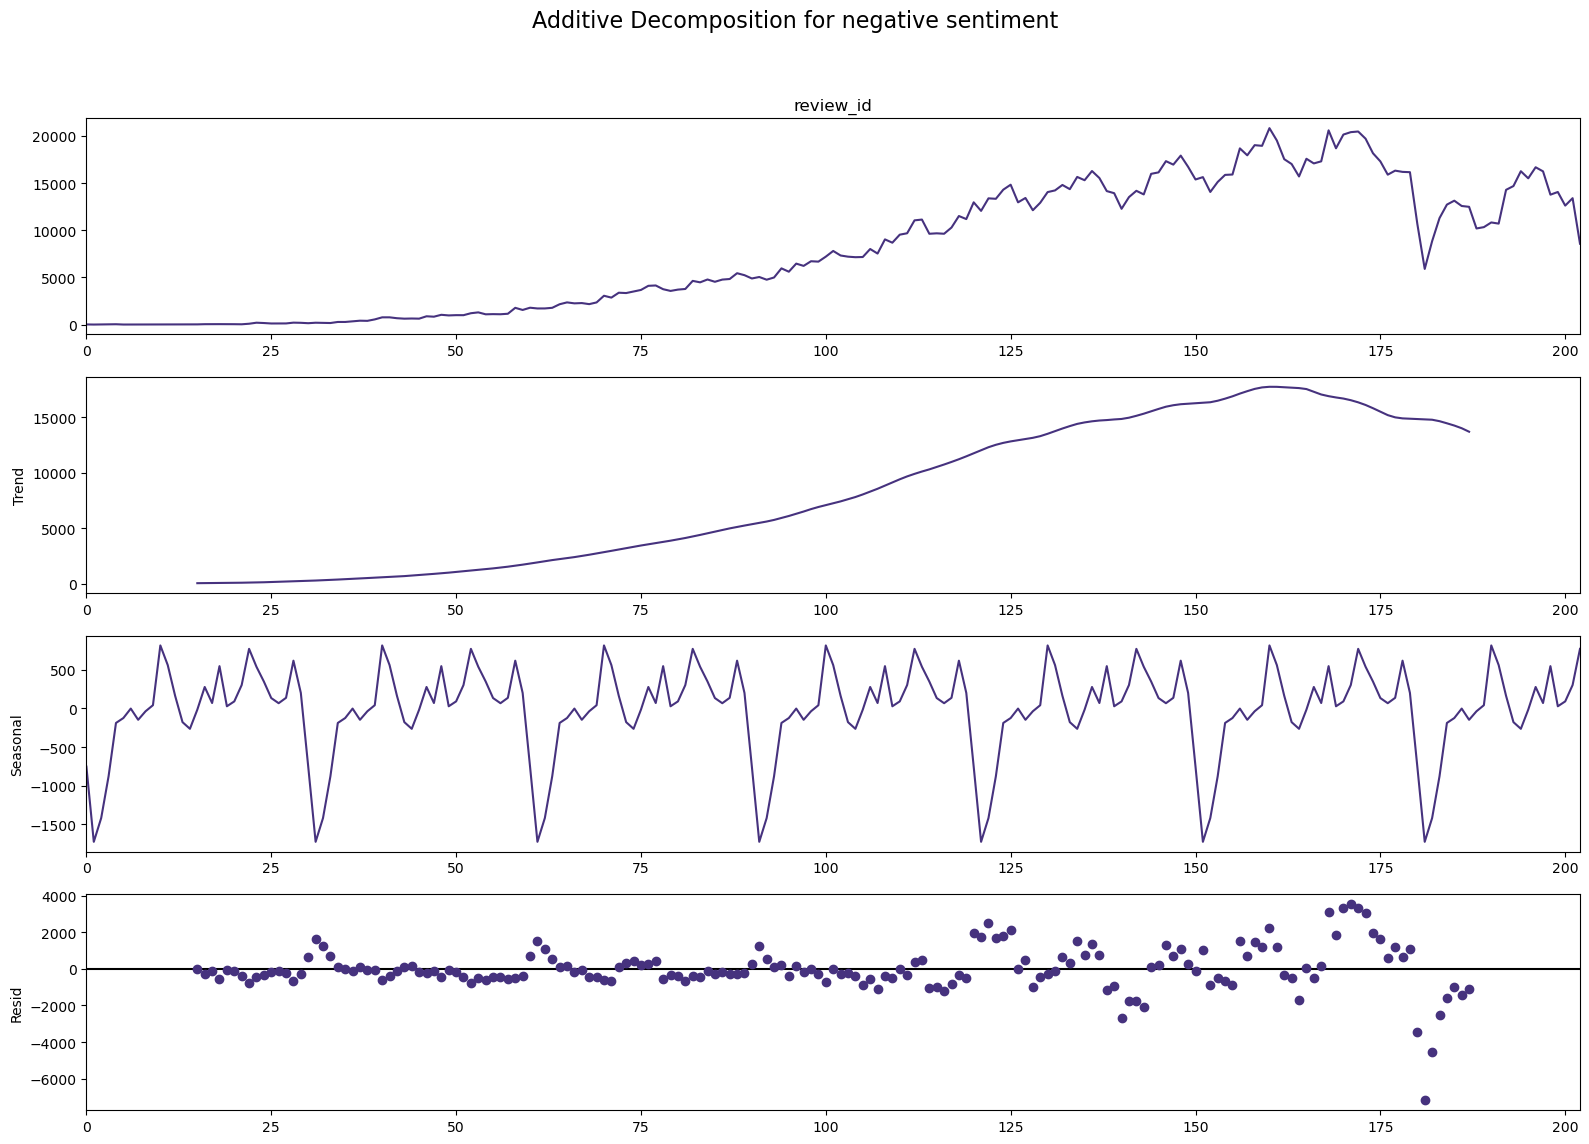

In [21]:
##### Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
##The seasonal_decompose in statsmodels implements this conveniently.

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(neg_pp['review_id'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(neg_pp['review_id'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition for negative sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition for negative sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

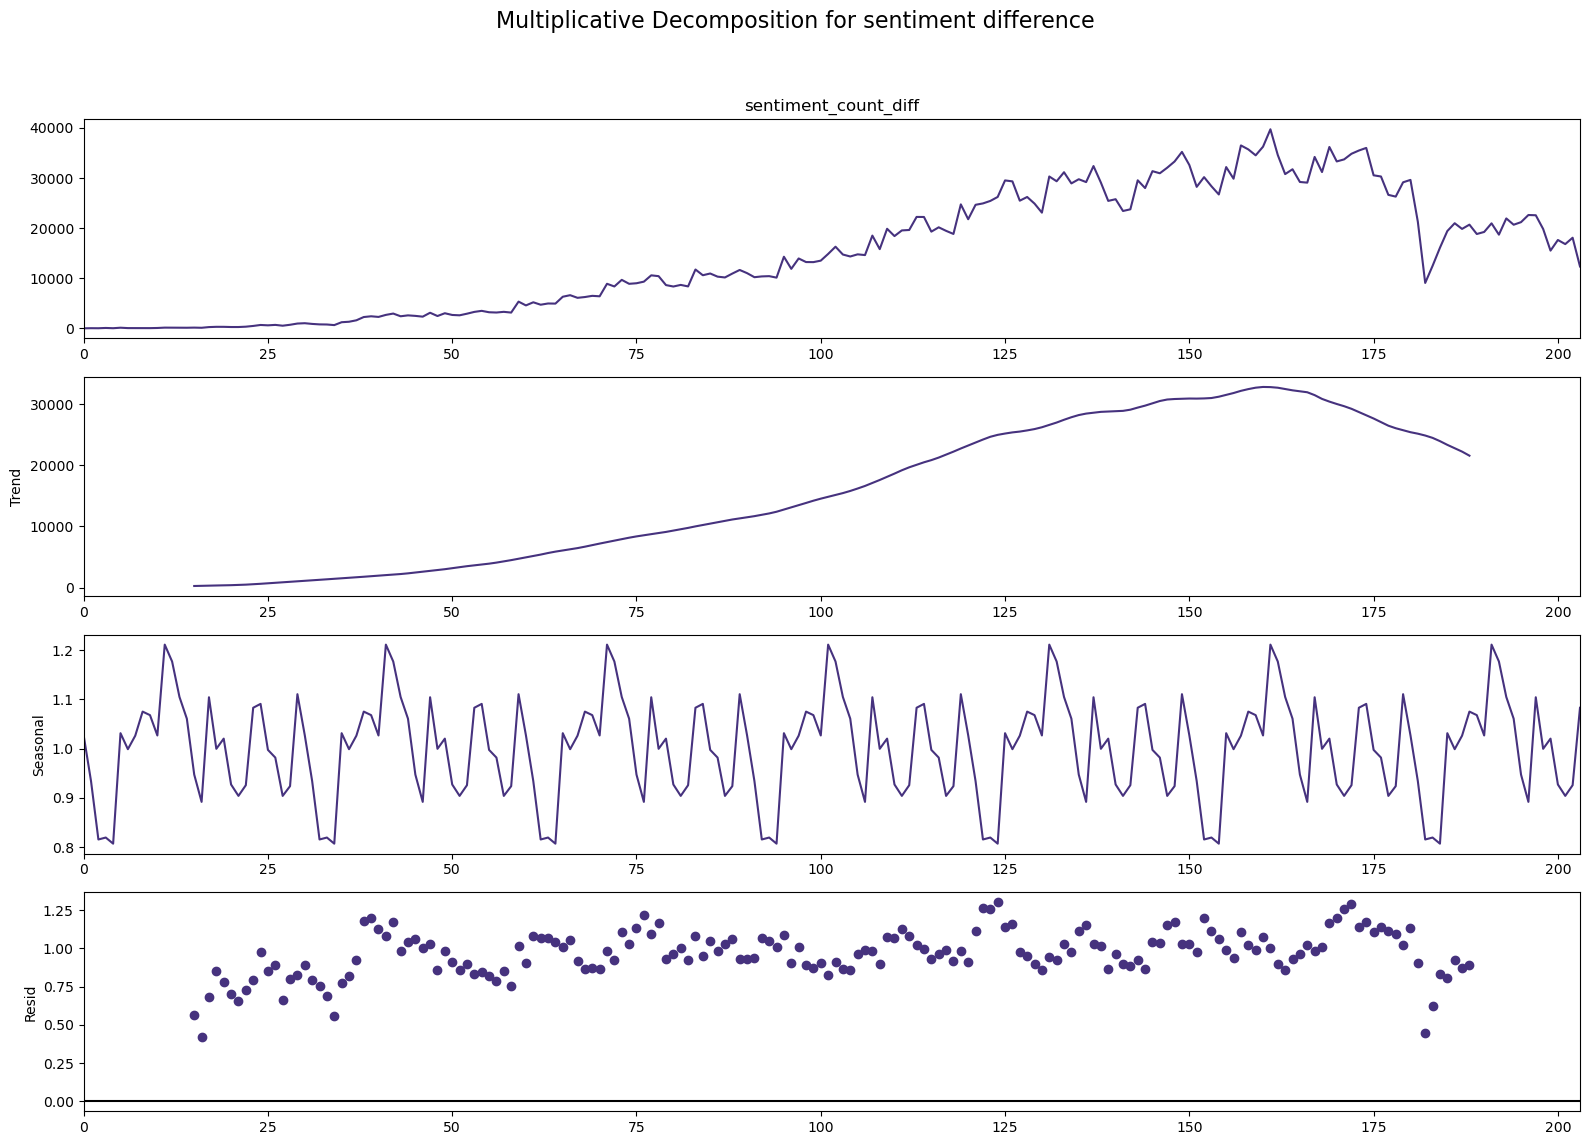

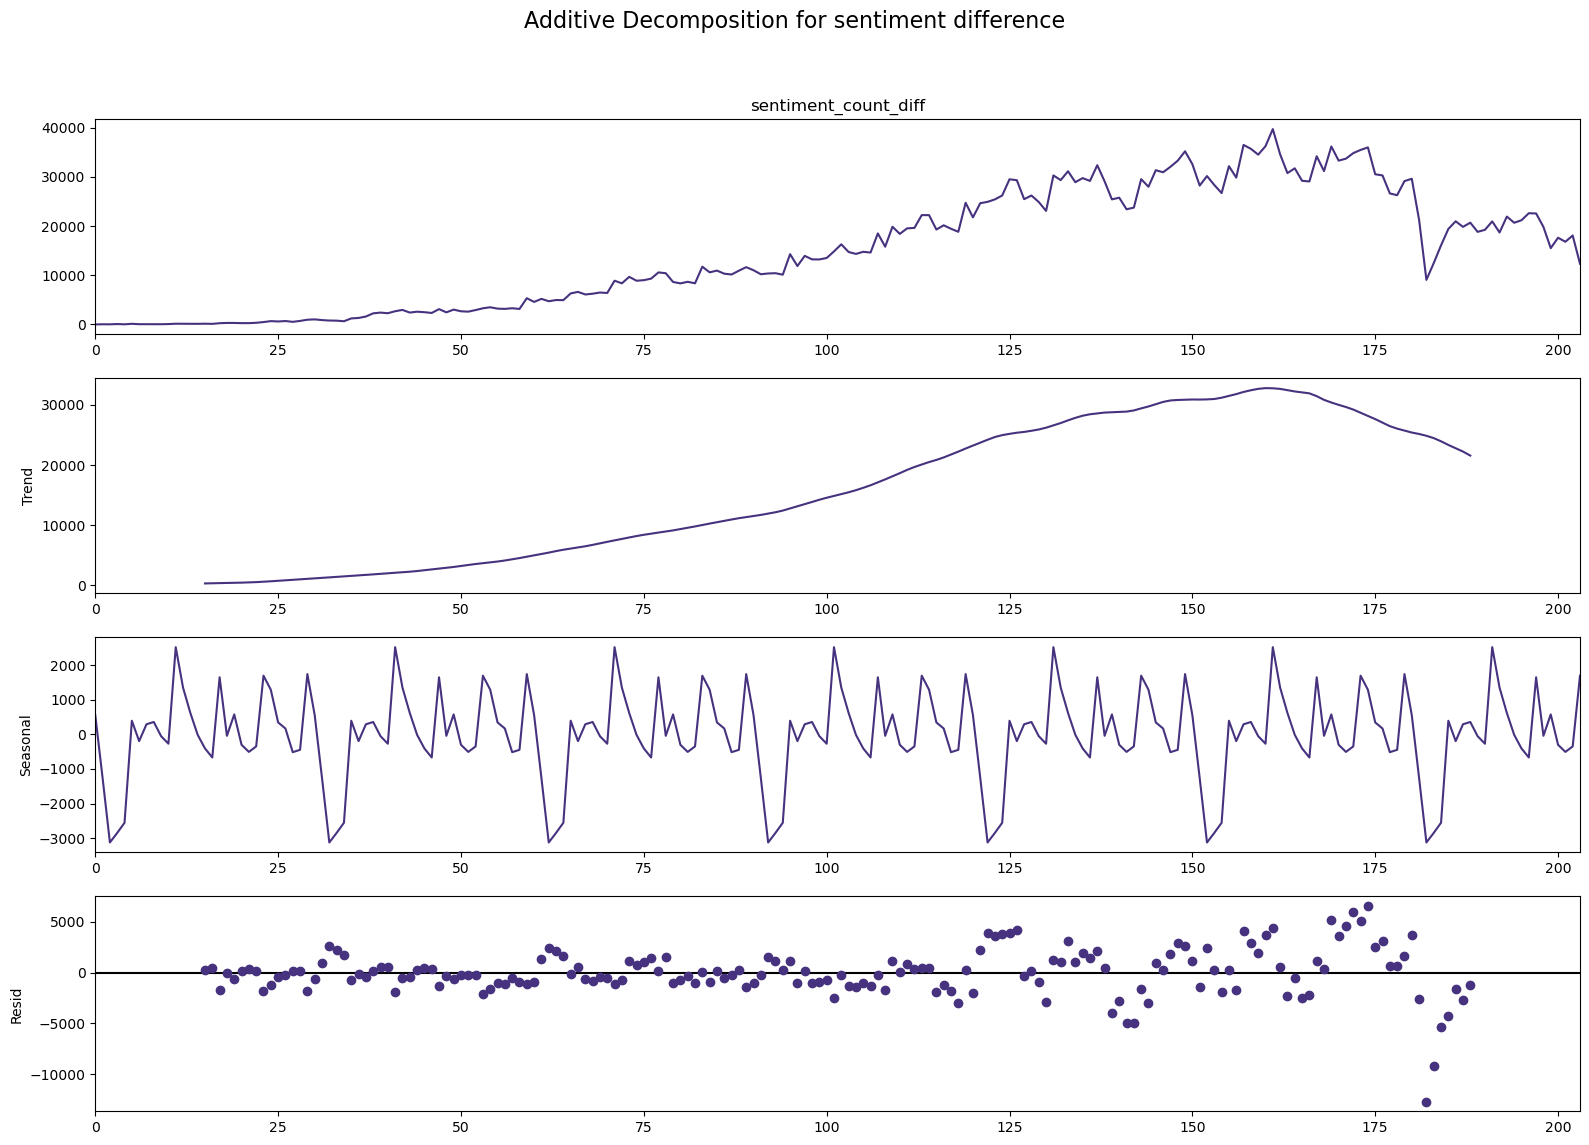

In [22]:
##### Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
##The seasonal_decompose in statsmodels implements this conveniently.

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df_num['sentiment_count_diff'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_num['sentiment_count_diff'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition for sentiment difference', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition for sentiment difference', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

##### Exponential Smoothing

In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, HoltWintersResults

In [59]:
HoltWintersAdditive = ExponentialSmoothing(endog=pos_pp['review_id'], trend='additive', seasonal='additive', seasonal_periods=12)
HoltWintersAdditive_results = HoltWintersAdditive.fit()
HoltWintersAdditive_results.summary()

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,review_id,No. Observations:,187
Model:,ExponentialSmoothing,SSE,1479273987.037
Optimized:,True,AIC,3002.254
Trend:,Additive,BIC,3053.951
Seasonal:,Additive,AICC,3006.325
Seasonal Periods:,12,Date:,"Mon, 02 Oct 2023"
Box-Cox:,False,Time:,16:41:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8889286,alpha,True
smoothing_trend,0.0001,beta,True


In [60]:
HoltWintersMultiplicative = ExponentialSmoothing(endog=pos_pp['review_id'], trend='multiplicative', seasonal='multiplicative', seasonal_periods=12)
HoltWintersMultiplicative_results = HoltWintersMultiplicative.fit()
HoltWintersMultiplicative_results.summary()

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,review_id,No. Observations:,187
Model:,ExponentialSmoothing,SSE,1602322222.836
Optimized:,True,AIC,3017.195
Trend:,Multiplicative,BIC,3068.893
Seasonal:,Multiplicative,AICC,3021.267
Seasonal Periods:,12,Date:,"Mon, 02 Oct 2023"
Box-Cox:,False,Time:,16:42:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7828571,alpha,True
smoothing_trend,0.0626286,beta,True


In [61]:
HoltWintersAdditive_results.forecast(12)

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


187    20118.964179
188    21902.451944
189    18390.058515
190    20993.107574
191    21373.181426
192    22680.629132
193    20476.457909
194    16905.900314
195    19103.166312
196    17535.716929
197    19271.467529
198    23315.974842
dtype: float64

In [62]:
HoltWintersMultiplicative_results.forecast(12)

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


187    23425.048450
188    25711.964964
189    22835.207967
190    25736.660688
191    26612.899291
192    26630.095784
193    24616.778007
194    21070.659202
195    21292.975677
196    18779.806228
197    18727.638393
198    20418.655798
dtype: float64

##### Stationary and Non-Stationary Time Series 

In [23]:
# Convert 'Date' column to a numeric representation
pos_pp['date'] = pos_pp['date'].apply(lambda x: x.timestamp())
neg_pp['date'] = neg_pp['date'].apply(lambda x: x.timestamp())

# Checking the result
display(pos_pp)

,date,review_id
0,1.107216e+09,3
1,1.109635e+09,43
2,1.112314e+09,21
3,1.114906e+09,84
4,1.117584e+09,30
...,...,...
199,1.630454e+09,29284
200,1.633046e+09,31688
201,1.635725e+09,29425
202,1.638317e+09,31484


ADF Statistic: -1.343634385215392
p-value: 0.608980793029125
Critical Values:
   1%: -3.465620397124192
   5%: -2.8770397560752436
   10%: -2.5750324547306476


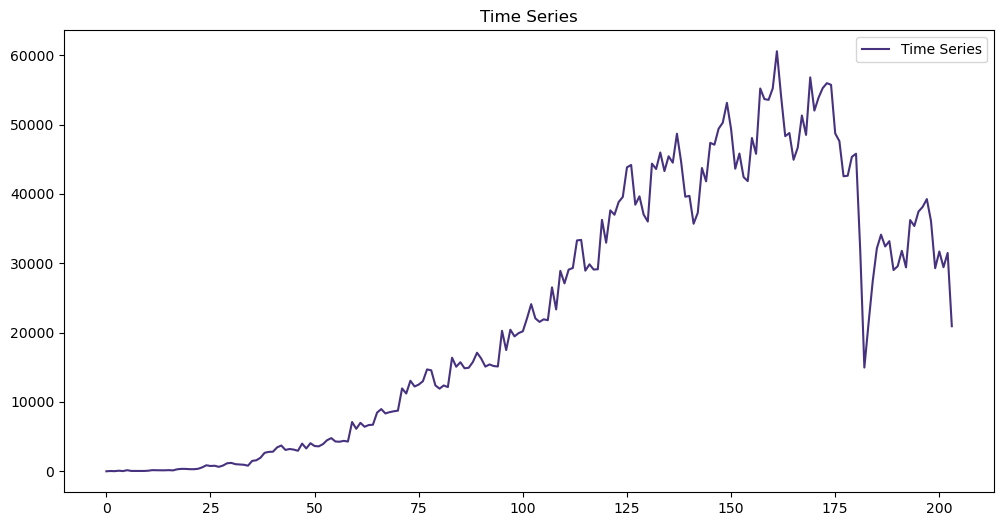

In [24]:
# Check stationarity for the example time series
#Augmented Dickey-Fuller (ADF) test, a common statistical test for stationarity
utils.check_stationarity(pos_pp['review_id'])

#### The high p-value and the ADF statistic being greater than the critical values suggest that we fail to reject the null hypothesis. The null hypothesis of the ADF test is that the time series has a unit root and is non-stationary.

ADF Statistic: -1.2381921280472494
p-value: 0.6569545268159828
Critical Values:
   1%: -3.465811691080702
   5%: -2.877123351472649
   10%: -2.5750770662586864


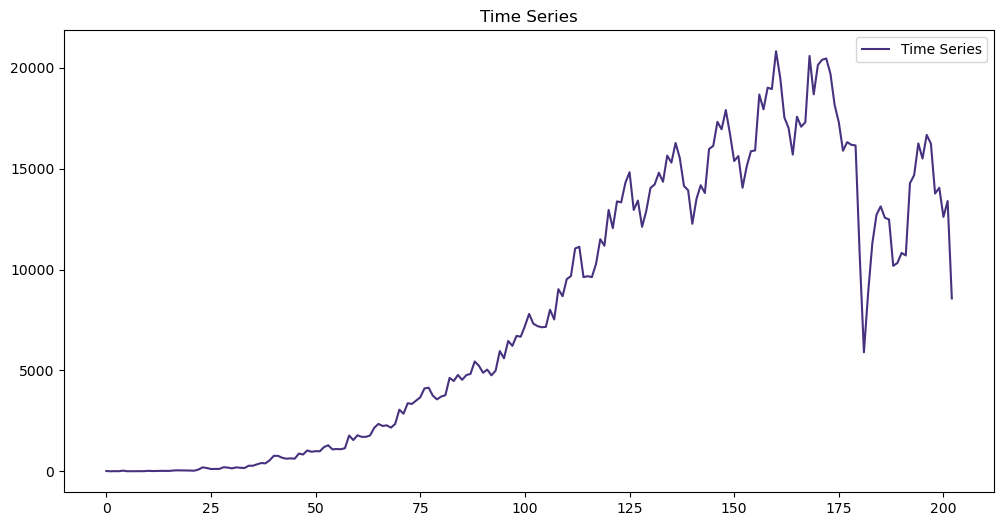

In [25]:
def check_stationarity(ts):
    # ADF test
    result = adfuller(ts, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(ts, label='Time Series')
    plt.title('Time Series')
    plt.legend()
    plt.show()

# Check stationarity for the example time series
check_stationarity(neg_pp['review_id'])

#### The high p-value and the ADF statistic being greater than the critical values suggest that we fail to reject the null hypothesis. The null hypothesis of the ADF test is that the time series has a unit root and is non-stationary.

ADF Statistic: -1.417111352498151
p-value: 0.5740457876294054
Critical Values:
   1%: -3.4654311561944873
   5%: -2.8769570530458792
   10%: -2.574988319755886


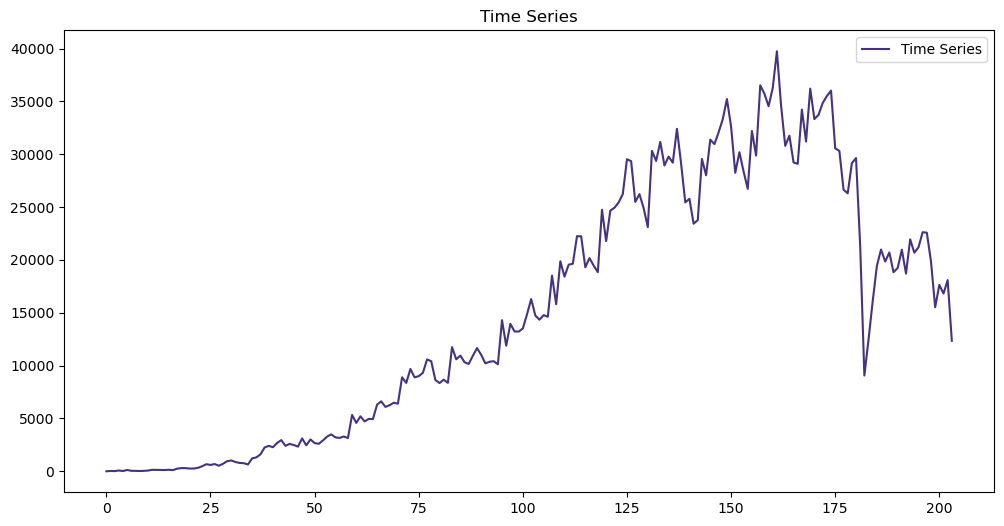

In [26]:
# Check stationarity for the example time series
utils.check_stationarity(df_num['sentiment_count_diff'])

###### below I am testing if the moving average makes the time series stationary
###### but is failed

https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322

In [27]:
pos_pp['moving_avg'] = pos_pp['review_id'].rolling(window=6).mean()
# Drop NaN values (resulting from the rolling mean operation)
pos_pp.dropna(inplace=True)

ADF Statistic: -1.336640439304605
p-value: 0.6122470914011551
Critical Values:
   1%: -3.466598080268425
   5%: -2.8774669520682674
   10%: -2.5752604356654425


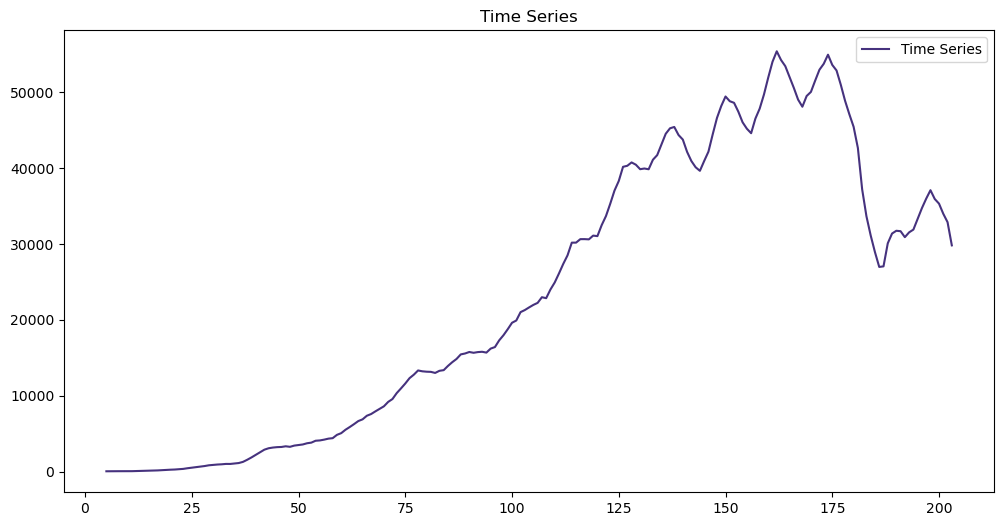

In [28]:
# Check stationarity for the example time series
utils.check_stationarity(pos_pp['moving_avg'])

In [29]:
#Here we are to use the differencing method to make the time series stationary
#This involves subtracting each observation from the one preceding it. You can also try second-order differencing if needed.
pos_pp['stationary_series'] = pos_pp['review_id'] - pos_pp['review_id'].shift(12)
pos_pp.dropna(inplace=True)

ADF Statistic: -2.3291724690972186
p-value: 0.16273178984524372
Critical Values:
   1%: -3.473542528196209
   5%: -2.880497674144038
   10%: -2.576878053634677


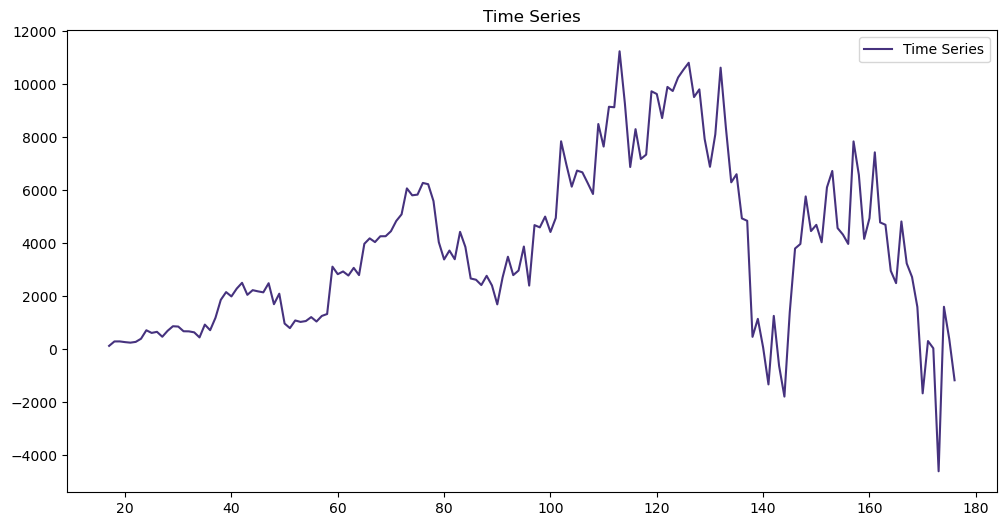

In [46]:
# Check stationarity for the example time series
check_stationarity(pos_pp.head(160)['stationary_series'])

##### The ADF Statistic is more extreme (in the rejection region) than the critical values at all typical significance levels (1%, 5%, 10%).
Therefore, you would reject the null hypothesis, indicating that there is enough evidence to conclude that your time series is stationary. A lower p-value and a more extreme ADF Statistic provide stronger evidence against the null hypothesis of non-stationarity.

In summary, your time series appears to be stationary based on the ADF test results.

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


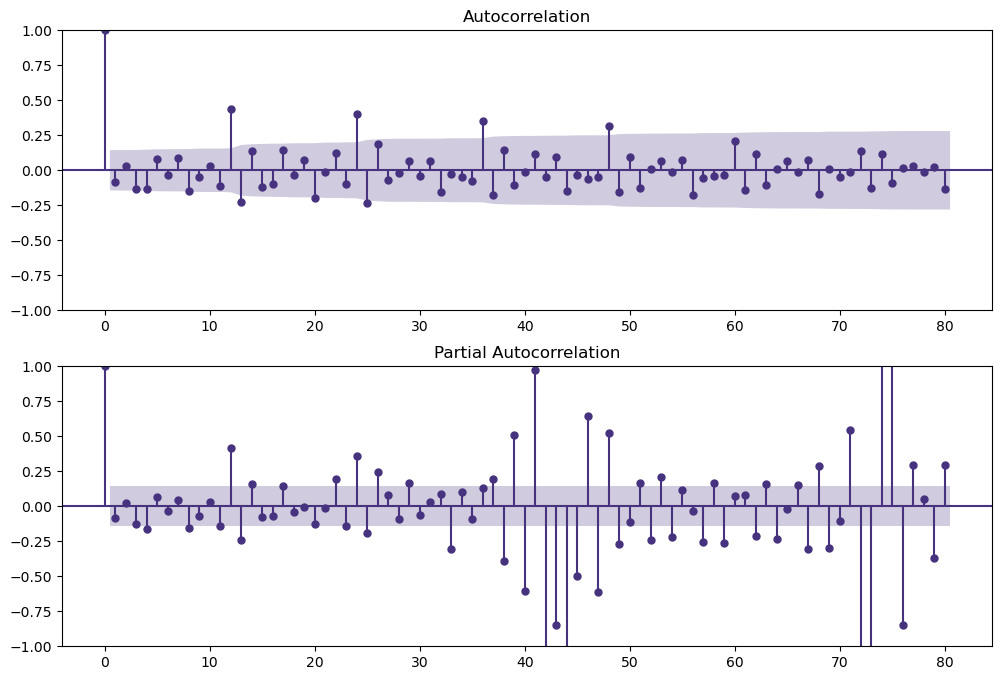

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#pos['date'] = pos['date'].apply(lambda x: x.timestamp())
# Assuming your time series is stored in 'ts'
ts_diff = pos_pp['review_id'].diff().dropna()  # Differencing to achieve stationarity

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(ts_diff, ax=ax1, lags=80)
plot_pacf(ts_diff, ax=ax2, lags=80)

plt.show()


/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: Use

                               SARIMAX Results                                
Dep. Variable:              review_id   No. Observations:                  187
Model:               ARIMA(12, 1, 12)   Log Likelihood               -1720.988
Date:                Mon, 02 Oct 2023   AIC                           3491.975
Time:                        16:31:31   BIC                           3572.619
Sample:                             0   HQIC                          3524.655
                                - 187                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0703      0.426     -0.165      0.869      -0.904       0.764
ar.L2          0.4237      0.518      0.819      0.413      -0.591       1.438
ar.L3         -0.0408      0.400     -0.102      0.9

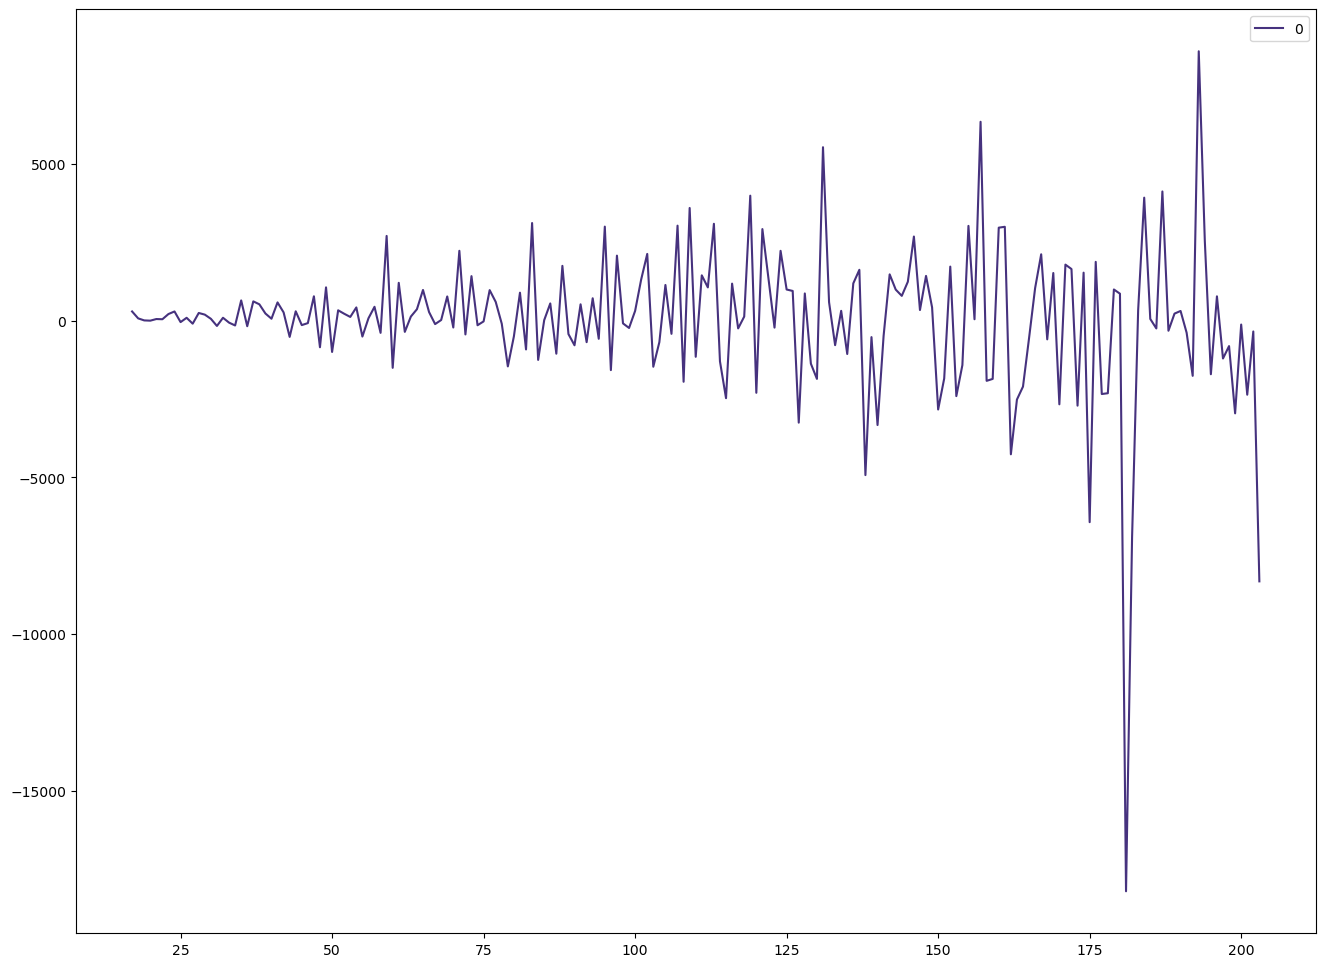

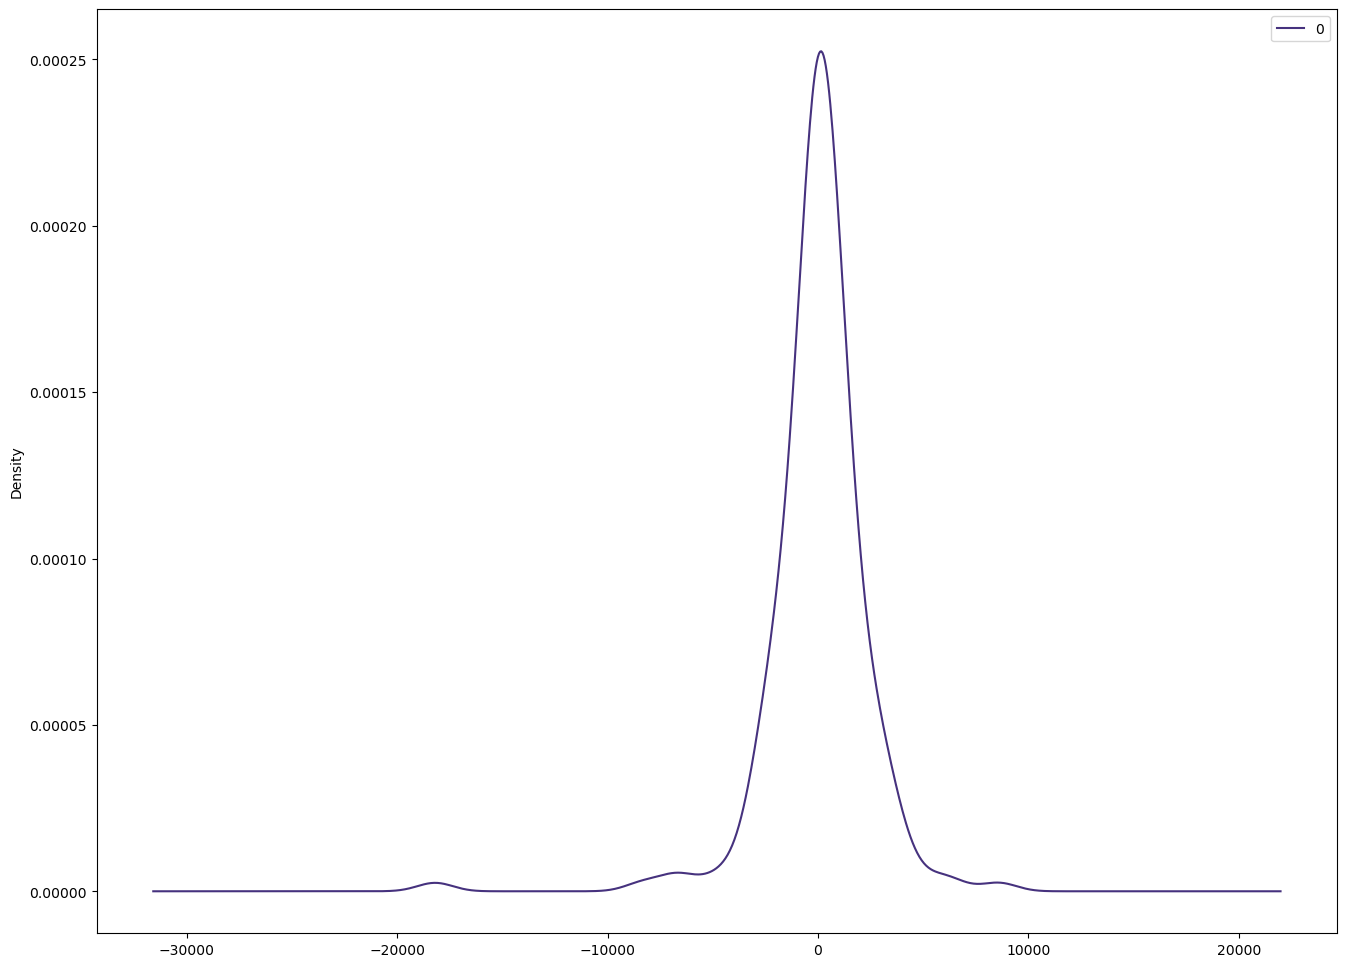

                  0
count    187.000000
mean      13.797492
std     2394.777519
min   -18202.294006
25%     -645.194655
50%       69.988975
75%      987.607487
max     8586.431399


In [48]:
# fit model
model = ARIMA(pos_pp['review_id'], order=(12,1,12))  #p,d,q
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


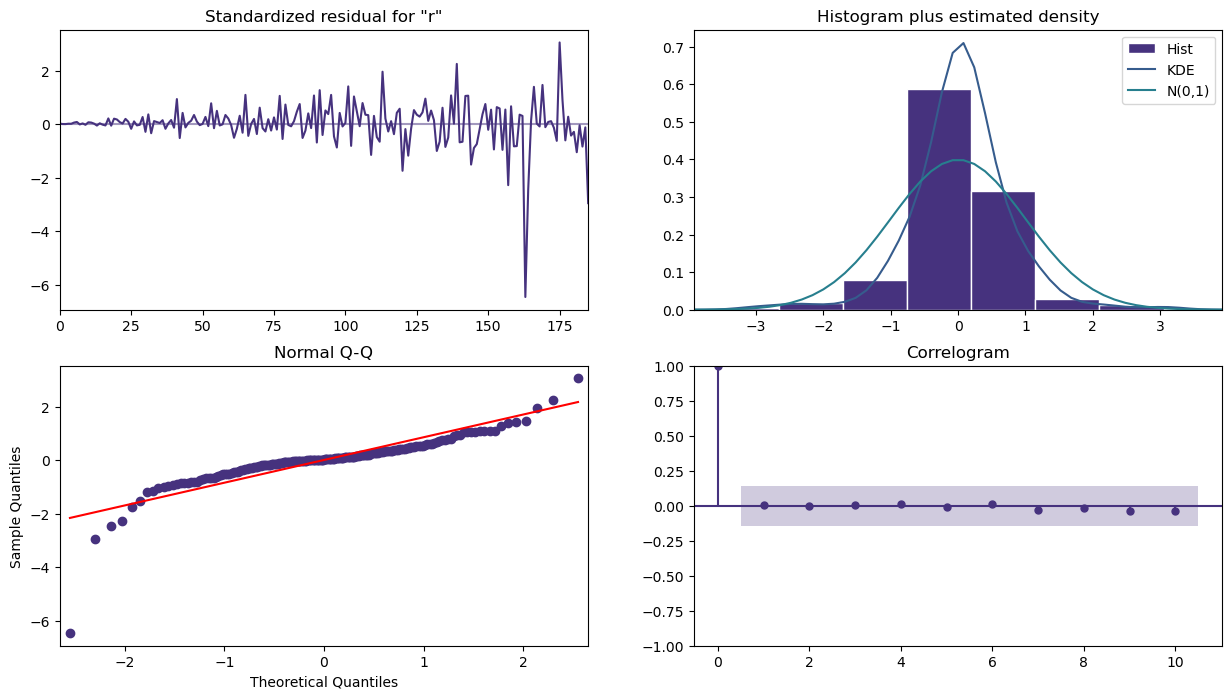

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


TypeError: unsupported operand type(s) for +: 'numpy.int64' and 'DateOffset'

In [49]:
# Plot residuals
results = model.fit()
results.plot_diagnostics(figsize=(15, 8))
plt.show()

# Forecast future values
forecast_steps = 12  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame({'forecast': forecast.predicted_mean.values}, index=forecast_index)

# Plot the original time series and the forecast
plt.plot(df['review_id'], label='Original Time Series')
plt.plot(forecast_df['forecast'], label='Forecast')
plt.legend()
plt.show()